In [1]:
from torchsummary import summary
import torch
from unet_pytorch import UNet270480
from unet import u_net
import tensorflow as tf

/home/jreymond/.conda/envs/pyth3_9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-24 09:35:11.999819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 09:35:12.203789: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-24 09:35:12.975377: W tensorflow/compiler/xla/stream_executor/platfo

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-03-27


In [9]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now.date())
now.strftime("%H-%M-%S")

now = 2023-03-27


'09-25-13'

In [1]:
# filepath = '/home/jreymond/LenslessLearning/saved_models/model_unet.pt'
# torch_model = UNet270480((3, 270, 480))
# summary(torch_model, (3, 270, 480), device='cpu')

# test = torch.randn(1, *(3, 270, 480), requires_grad=False)
# torch_model(test)

In [2]:
# model = u_net((270, 480, 3))
# model.summary()

In [2]:
from functools import partial
from train import weighted_loss, get_lpips_loss
from keras import backend as K
from tensorflow.keras.losses import MeanSquaredError

lpips_loss = tf.keras.models.load_model('/home/jreymond/lensless_ml/lpips_losses/lpips_alex_shape_270_480_3.pb')
lpips2 = lambda x, y : lpips_loss(input1=tf.transpose(x, perm=[0, 3, 1, 2]), input2=tf.transpose(y, perm=[0, 3, 1, 2]))

alpha_lpips = K.variable(0.5)
alpha_mse = K.variable(1)
lpips_weighted = partial(weighted_loss, loss_function=lpips_loss, alpha=alpha_lpips)
mse_weighted = partial(weighted_loss, loss_function=MeanSquaredError(), alpha=alpha_mse)


2023-03-21 14:55:33.015196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 14:55:35.646028: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21825 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:17:00.0, compute capability: 8.6
2023-03-21 14:55:35.646621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21607 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:65:00.0, compute capability: 8.6


In [15]:
from lpips import LPIPS
from datetime import datetime

#Bug: cannot have different batch sizes
input_shape = (4, 270, 480, 3)
test1 = tf.random.uniform(input_shape, seed=2)
test2 = tf.random.uniform(input_shape, seed=3)

test1_t = tf.transpose(test1,perm=[0, 3, 1, 2])
test2_t = tf.transpose(test2,perm=[0, 3, 1, 2])

# lpips_weighted(test

# print(mse_weighted(test1, test2))
# K.set_value(alpha_mse, 2)
# print(mse_weighted(test1, test2))

l = LPIPS(net="alex", verbose=False)

torch_test1 = torch.from_numpy(test1_t.numpy())
torch_test2 = torch.from_numpy(test2_t.numpy())

# start_time = datetime.now()
# for i in range(2000):
#     l(torch_test1, torch_test2)
# end_time = datetime.now()
# print('Duration: {}'.format(end_time - start_time))
l(torch_test1, torch_test2)

tensor([[[[0.1622]]],


        [[[0.1618]]],


        [[[0.1520]]],


        [[[0.1588]]]], grad_fn=<AddBackward0>)

In [ ]:
l2 = get_lpips_loss

In [16]:
lpips = lambda x, y : lpips_loss(input1=tf.transpose(x, perm=[0, 3, 1, 2]), input2=tf.transpose(y, perm=[0, 3, 1, 2]))

lpips(test1, test2)

{'output': <tf.Tensor: shape=(4, 1, 1, 1), dtype=float32, numpy=
 array([[[[0.16215575]]],
 
 
        [[[0.16182628]]],
 
 
        [[[0.1519787 ]]],
 
 
        [[[0.15879427]]]], dtype=float32)>}

In [4]:
start_time = datetime.now()
for i in range(2000):
    lpips_loss(input1=test1 , input2=test2)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

2023-03-21 14:42:06.038255: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-03-21 14:42:06.041560: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-03-21 14:42:06.044068: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2023-03-21 14:42:06.044082: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:237] Used ptxas at ptxas
2023-03-21 14:42:06.044143: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation.

Duration: 0:00:11.475876


In [2]:
d = dict(fd="fdjafds")
d['fd']

'fdjafds'

### flatnet implementation

In [30]:
import torch 
import torch.functional as F
import numpy as np

In [5]:
def roll_n(X, axis, n):
    f_idx = tuple(
        slice(None, None, None) if i != axis else slice(0, n, None)
        for i in range(X.dim())
    )
    b_idx = tuple(
        slice(None, None, None) if i != axis else slice(n, None, None)
        for i in range(X.dim())
    )
    front = X[f_idx]
    back = X[b_idx]
    return torch.cat([back, front], axis)

In [ ]:
args = dict(psf_height=0,
            psf_width=0,
            psf_crop_size_x=0,
            psf_crop_size_y=0)

wiener_crop = torch.Tensor()

In [ ]:
pad_x = args['psf_height'] - args['psf_crop_size_x']
pad_y = args['psf_width'] - args['psf_crop_size_y']

 # Pad to psf_height, psf_width
fft_layer = 1 * wiener_crop
fft_layer = F.pad(fft_layer, (pad_y // 2, pad_y // 2, pad_x // 2, pad_x // 2))

# Centre roll
for dim in range(2):
    # fft_layer = roll_n(fft_layer, axis=dim, n=fft_layer.size(dim) // 2)
    #
    fft_layer = torch.roll(fft_layer, dims=dim, shifts=-(fft_layer.size(dim) // 2))

In [25]:
X = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
])

roll_n(X, axis=0, n=-2)

tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 1,  2,  3,  4]])

In [26]:
torch.roll(X, 2, dims=0).numpy() 

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 1,  2,  3,  4]])

In [31]:
for i in range(-3, 3):
    for dim in [0,1]:
        assert np.array_equal(torch.roll(X, -i, dims=dim).numpy(), roll_n(X, axis=dim, n=i).numpy())

In [9]:
import torch
import tensorflow as tf

b, c, h, w = 1, 2, 3, 4
input = torch.arange(b * c * h * w, dtype=torch.float32).reshape((b, c, h, w)) 
# input = torch.fft.fft2(input)
input, input.shape

(tensor([[[[ 0.,  1.,  2.,  3.],
           [ 4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11.]],
 
          [[12., 13., 14., 15.],
           [16., 17., 18., 19.],
           [20., 21., 22., 23.]]]]),
 torch.Size([1, 2, 3, 4]))

In [11]:
input2 = tf.reshape(tf.range(b* c* h* w, dtype=tf.float32), (b, h, w, c)) 
# input2 = tf.signal.rfft2d(input2)
input2, input2.shape

(<tf.Tensor: shape=(1, 3, 4, 2), dtype=float32, numpy=
 array([[[[ 0.,  1.],
          [ 2.,  3.],
          [ 4.,  5.],
          [ 6.,  7.]],
 
         [[ 8.,  9.],
          [10., 11.],
          [12., 13.],
          [14., 15.]],
 
         [[16., 17.],
          [18., 19.],
          [20., 21.],
          [22., 23.]]]], dtype=float32)>,
 TensorShape([1, 3, 4, 2]))

In [12]:

b, h, w, c = input2.shape

i2 = tf.transpose(input2, perm=[0, 3,  1, 2])
i3 = tf.reshape(input2, (b, c, h, w))
i2, i3

(<tf.Tensor: shape=(1, 2, 3, 4), dtype=float32, numpy=
 array([[[[ 0.,  2.,  4.,  6.],
          [ 8., 10., 12., 14.],
          [16., 18., 20., 22.]],
 
         [[ 1.,  3.,  5.,  7.],
          [ 9., 11., 13., 15.],
          [17., 19., 21., 23.]]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2, 3, 4), dtype=float32, numpy=
 array([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]], dtype=float32)>)

## separable multiplication check

In [7]:
def reshape_matmul(x):
    b, h, w, c = x.shape
    return tf.reshape(x, (b, c, h, w))

def reshape_original(x):
    b, c, h, w = x.shape
    return tf.reshape(x, (b, h, w, c))


In [9]:

b, m, n, c = 2, 5, 7, 3 
p = 11
A = tf.Variable(tf.zeros(shape=(b, m, n, c)))
B = tf.Variable(tf.ones(shape=(b, n, p, c)))
A = reshape_matmul(A)
B = reshape_matmul(B)
C = tf.matmul(A, B)
C.shape

TensorShape([2, 3, 5, 11])

In [2]:
a = 0

In [2]:
from utils import *
from tensorflow.keras.losses import MeanSquaredError



2023-03-27 15:22:14.832688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 15:22:14.952411: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-27 15:22:15.617900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-27 15:22:15.617946: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [22]:
import torch

def unpixel_shuffle(feature, r: int = 1):
    b, c, h, w = feature.shape
    out_channel = c * (r ** 2)
    out_h = h // r
    out_w = w // r
    feature_view = feature.contiguous().view(b, c, out_h, r, out_w, r)
    feature_prime = (
        feature_view.permute(0, 1, 3, 5, 2, 4)
        .contiguous()
        .view(b, out_channel, out_h, out_w)
    )
    return feature_prime


r = 2 
n, c, h, w = input.shape

input = torch.randn(1, 1, 12, 12)
unshuffler = torch.nn.PixelUnshuffle(r)

a = unshuffler(input)
b = unpixel_shuffle(input, r)



b = unpixel_shuffle(input, r).reshape(
                    n ,
                    c* r ** 2,
                    h // r,
                    w // r,
                )

In [23]:
print(a.shape, b.shape)

(a ==b).all()

torch.Size([1, 4, 6, 6]) torch.Size([1, 4, 6, 6])


tensor(True)

In [1]:
from os import walk
import os
import glob
dir_y = '/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/groundtruth'
dir_x = '/scratch/bezzam/ICCV-2019-FlatNet-Dataset/Display-Captures/measurements'
f = []
# for (dirpath, dirnames, filenames) in walk(mypath):
#     # print(dirnames)
#     # print(filenames)
#     # print(dirpath)
#     f.extend(filenames)
#     # break
# filenames


x_filenames = sorted(glob.glob(dir_x + '/*/*'), key=lambda f: os.path.basename(f).replace('..png',''))
y_filenames = sorted(glob.glob(dir_y + '/*/*'), key=lambda f: os.path.basename(f).replace('.JPEG',''))
        
x_names = [os.path.basename(f).replace('..png','') for f in x_filenames]
y_names = [os.path.basename(f).replace('.JPEG','') for f in y_filenames]

assert x_names == y_names, 'some of the samples do not match : list(groundtruths) != list(measurements)'

# x_filenames
len(x_filenames), len(y_filenames), len(x_names)

(10000, 10000, 10000)

In [2]:
import importlib
import dataset
import utils
importlib.reload(dataset)
importlib.reload(utils)

from dataset import *
from utils import *

data_conf = get_config_from_yaml('/home/jreymond/lensless_ml/configs/dataset/phlatnet_dataset.yaml')


indexes = np.arange(data_conf['len'])
generator = FlatnetDataGenerator(data_conf, indexes=indexes)




In [3]:

for x,y in generator:

    print(x.shape, y.shape)



(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)
(8, 4, 1280, 1408)


raw x shape : (1024, 1280)
psf shape : (1280, 1408)

In [5]:
data_conf['psf']['path']

'/scratch/jreymond/phlatnet/phase_psf/psf.npy'

In [17]:

# arr = np.load(data_conf['psf']['path']')
arr = cv2.imread('/scratch/jreymond/phlatnet/imagenet_caps_383_12bit_Feb_19_sample/n07930864/n07930864_4104.png', -1) / MAX_UINT16_VAL
arr = utils.extract_bayer(arr)


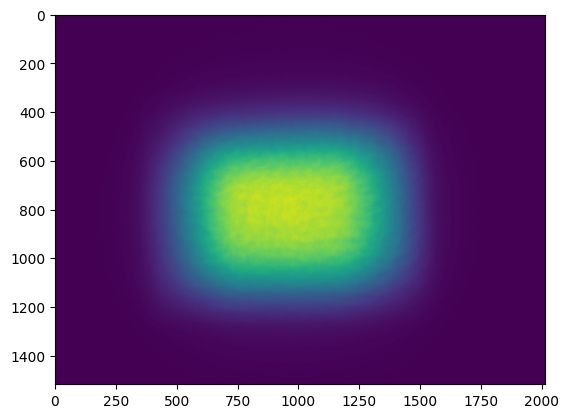

In [22]:
from matplotlib import pyplot as plt

plt.imshow(arr[:, :, 0])

In [ ]:
# crop:
#   meas_height: 1518 
#   meas_width: 2012 
#   meas_crop_size_x: 1280 
#   meas_crop_size_y: 1408 
#   meas_centre_x: 808 
#   meas_centre_y: 965

crop = dict(meas_height= 1518, 
            meas_width= 2012, 
            meas_crop_size_x= 1280, 
            meas_crop_size_y= 1408 ,
            meas_centre_x= 808, 
            meas_centre_y= 965)
dataset_config = dict(crop=crop)

dataset_config['crop']['meas_centre_x']
- dataset_config['crop']['meas_crop_size_x'] // 2



In [1]:
if "":
    print('fdsa')
else :
    print('ff')

ff


(130, 100)


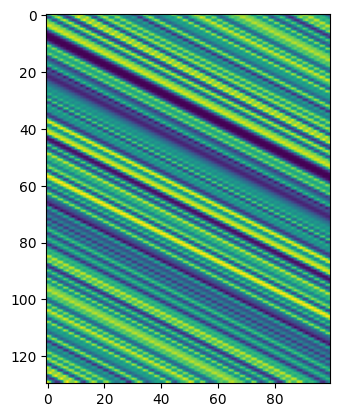

In [23]:
# pixel_pitch

# l_slope = (H / h) / (M / pixel_pitch)

# r_slope
import numpy as np
import scipy
import cv2
import random
from matplotlib import pyplot as plt

#default value
l_slope = 3
r_slope = 2

def get_toeplitz_init(target_shape, slope, seed=1):
    # consider that 
    first_d, second_d = target_shape
    is_left = first_d > second_d

    if is_left:
        # cv2 : in (width, height) format
        resized_dims = (int(first_d * slope), first_d)
        np.random.seed(seed)
        arr = np.random.rand(first_d)

        circulant_M = scipy.linalg.circulant(arr)

        resized_M = cv2.resize(circulant_M, resized_dims, interpolation= cv2.INTER_LINEAR)
        random.seed(seed)
        begin_index = random.choice(range(resized_M.shape[1] - second_d))

        cropped_M = resized_M[:, begin_index : begin_index + second_d]

    else : 
        # to get diff matrix for left and right
        seed += 1
        resized_dims = (second_d, int(second_d * slope))
        np.random.seed(seed)
        arr = np.random.rand(second_d)

        circulant_M = scipy.linalg.circulant(arr)

        resized_M = cv2.resize(circulant_M, resized_dims, interpolation= cv2.INTER_LINEAR)
        random.seed(seed)
        begin_index = random.choice(range(resized_M.shape[1] - first_d))

        cropped_M = resized_M[begin_index : begin_index + first_d, :]

    return cropped_M



res = get_toeplitz_init((130, 100), 2, 1) 
print(res.shape)

plt.imshow(res);



In [4]:
# def get_simulated_psf()

arr = list(range(10))

arr[2:0]

[2, 3, 4, 5, 6, 7]

# with tf API

In [12]:
import importlib
import tensorflow as tf
from tensorflow import keras
import yaml
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import tf_dataset
import dataset
import utils
importlib.reload(dataset)
importlib.reload(utils)
importlib.reload(tf_dataset)
from dataset import *
import hydra
from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.model_selection import train_test_split
from tf_dataset import *

In [13]:
config_name = "wallerlab_reconstruction"
model_path = '/home/jreymond/lensless_ml/stored_models/2023-04-25/wallerlab_unet.pb'

hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(config_path="configs", job_name="test_app")
config = compose(config_name= config_name)

/tmp/ipykernel_1498220/3938903348.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="configs", job_name="test_app")


In [14]:
dataset_config = config['dataset']
indexes = np.arange(200)

train_indexes, val_indexes = train_test_split(indexes, 
                                                  test_size=config['validation_split'], 
                                                  shuffle=True,
                                                  random_state=config['seed'])
    
    # Data Generators
data_args = dict(batch_size=config['batch_size'], 
                    greyscale=config['greyscale'],
                    use_crop=config['use_crop'], 
                    seed=config['seed'])
    
    # train_generator = get_dataset(config['dataset']['name'], dataset_config, train_indexes, data_args)
    # val_generator = get_dataset(config['dataset']['name'], dataset_config, val_indexes, data_args)

train_generator = get_tf_dataset(config['dataset']['name'], dataset_config, train_indexes, data_args)

Cause: could not parse the source code of <function WallerlabDaloader._map_y.<locals>.<lambda> at 0x7f6d783edf70>: no matching AST found among candidates:
# coding=utf-8
lambda item: tf.numpy_function(np_load, [item], tf.float32)
# coding=utf-8
lambda item: tf.transpose(item, perm=[2, 0, 1])
# coding=utf-8
lambda item: tf.numpy_function(np_load, [item], tf.float32)
# coding=utf-8
lambda item: tf.py_function(tf_rgb2gray, [item], tf.float32)
# coding=utf-8
lambda item: item[:, self.crop['low_h']:self.crop['high_h'], self.crop['low_w']:self.crop['high_w']]
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function WallerlabDaloader._map_y.<locals>.<lambda> at 0x7f6d783edf70>: no matching AST found among candidates:
# coding=utf-8
lambda item: tf.numpy_function(np_load, [item], tf.float32)
# coding=utf-8
lambda item: tf.transpose(item, perm=[2, 0, 1])
# coding=utf-8
lambda item: tf.numpy_function(np_load

In [15]:
crop = dataset_config['crop']['measurements']

In [16]:
for i in train_generator:
    print(i[0].shape, i[1].shape)

    tf_in =i[1]
    a = tf_in.numpy()[:, crop['low_h']: crop['high_h'],
                            crop['low_w']: crop['high_w']]
    a_test = tf_in[:, crop['low_h']: crop['high_h'],
                            crop['low_w']: crop['high_w']]
    # tf_a = tf.slice(tf_in,
    #                     [0, crop['low_h'], crop['low_w']],
    #                     [-1, crop['high_h'] - crop['low_h'], crop['high_w'] - crop['low_w']])
    # print(a.shape, tf_a.shape)
    

    break

(16, 3, 270, 480) (16, 3, 210, 380)
